In [115]:
# Combine into a dictionary
MON = {
    'Chane': {'Shadow Runeblade', 'Runeblade', 'Shadow', 'Generic'},
    'Levia': {'Shadow Brute', 'Brute', 'Shadow', 'Generic'},
    'Prism': {'Light Illusionist', 'Illusionist', 'Light', 'Generic'},
    'Boltyn': {'Light Warrior', 'Warrior', 'Light', 'Generic'},
}

ELE = {
    'Oldhim': {'Elemental\nGuardian', 'Guardian', 'Earth', 'Ice', 'Elemental'},
    'Lexi': {'Elemental\nRanger', 'Ranger', 'Ice', 'Lightning', 'Elemental'},
    'Briar': {'Elemental\nRuneblade', 'Runeblade', 'Lightning', 'Earth', 'Elemental'},
}

UPR = {
    'Iyslander': {'Ice Wizard', 'Wizard', 'Ice', 'Generic'},
    'Dromai': {'Draconic\nIllusionist', 'Illusionist', 'Draconic', 'Generic'},
    'Fai': {'Draconic\nNinja', 'Ninja', 'Draconic', 'Generic'},
}

OUT = {
    'Uzuri': {'Assassin', 'Assassin /\nNinja', 'Assassin /\nRanger', 'Generic'},
#    'Arakni': {'Assassin', 'Assassin /\nNinja', 'Assassin /\nRanger', 'Generic'},
    
    'Katsu': {'Ninja', 'Assassin /\nNinja', 'Generic'},
#    'Benji': {'Ninja', 'Assassin /\nNinja', 'Generic'},
    
    'Azalea': {'Ranger', 'Assassin /\nRanger', 'Generic'},
#    'Riptide': {'Ranger', 'Assassin /\nRanger', 'Generic'},
}

EVO = {
    'Dash': {'Mechanologist'},
    'Maxx': {'Mechanologist'},
    'Teklo': {'Mechanologist'},
}

HVY = {
    'Kayo': {'Brute', 'Brute /\nGuardian', 'Brute /\nWarrior', 'Generic'},
#    'Rhinar': {'Brute', 'Brute /\nGuardian', 'Brute /\nWarrior', 'Generic'},
    
    'Victor': {'Guardian', 'Brute /\nGuardian', 'Guardian /\nWarrior', 'Generic'},
#    'Betsy': {'Guardian', 'Brute /\nGuardian', 'Guardian /\nWarrior', 'Generic'},
    
    'Kassai': {'Warrior', 'Brute /\nWarrior', 'Guardian /\nWarrior', 'Generic'},
#    'Olympia': {'Warrior', 'Brute /\nWarrior', 'Guardian /\nWarrior', 'Generic'},
}

MST = {
    'Nuu': {'Mystic\nAssassin', 'Assassin', 'Mystic /\nGeneric'},
    'Zen': {'Mystic\nNinja', 'Ninja', 'Mystic /\nGeneric'},
    'Enigma': {'Mystic\nIllusionist', 'Illusionist', 'Mystic /\nGeneric'},
}

ROS = {
    'Florian': {'Earth\nRuneblade', 'Runeblade', 'Earth', 'Generic'},
    'Aurora': {'Lightning\nRuneblade', 'Runeblade', 'Lightning', 'Generic'},
    'Verdance': {'Earth\nWizard', 'Wizard', 'Earth', 'Generic'},
    'Oscilo': {'Lightning\nWizard', 'Wizard', 'Lightning', 'Generic'},
}

In [116]:
fab_sets = {
    'MON': MON,
    'ELE': ELE,
    'UPR': UPR,
    'OUT': OUT,
    'EVO': EVO,
    'HVY': HVY,
    'MST': MST,
    'ROS': ROS,
}

In [117]:
def create_dual_set(fab_set):
    dual_structure = {}
    # Populate the dual structure
    for hero, pools in fab_set.items():
        for pool in pools:
            if pool not in dual_structure:
                dual_structure[pool] = set()
            dual_structure[pool].add(hero)
            
    return dual_structure

In [118]:
fab_dual_sets = dict()
for set_name, set_structure in fab_sets.items():
    dual_set = create_dual_set(set_structure)
    fab_dual_sets[set_name] = dual_set

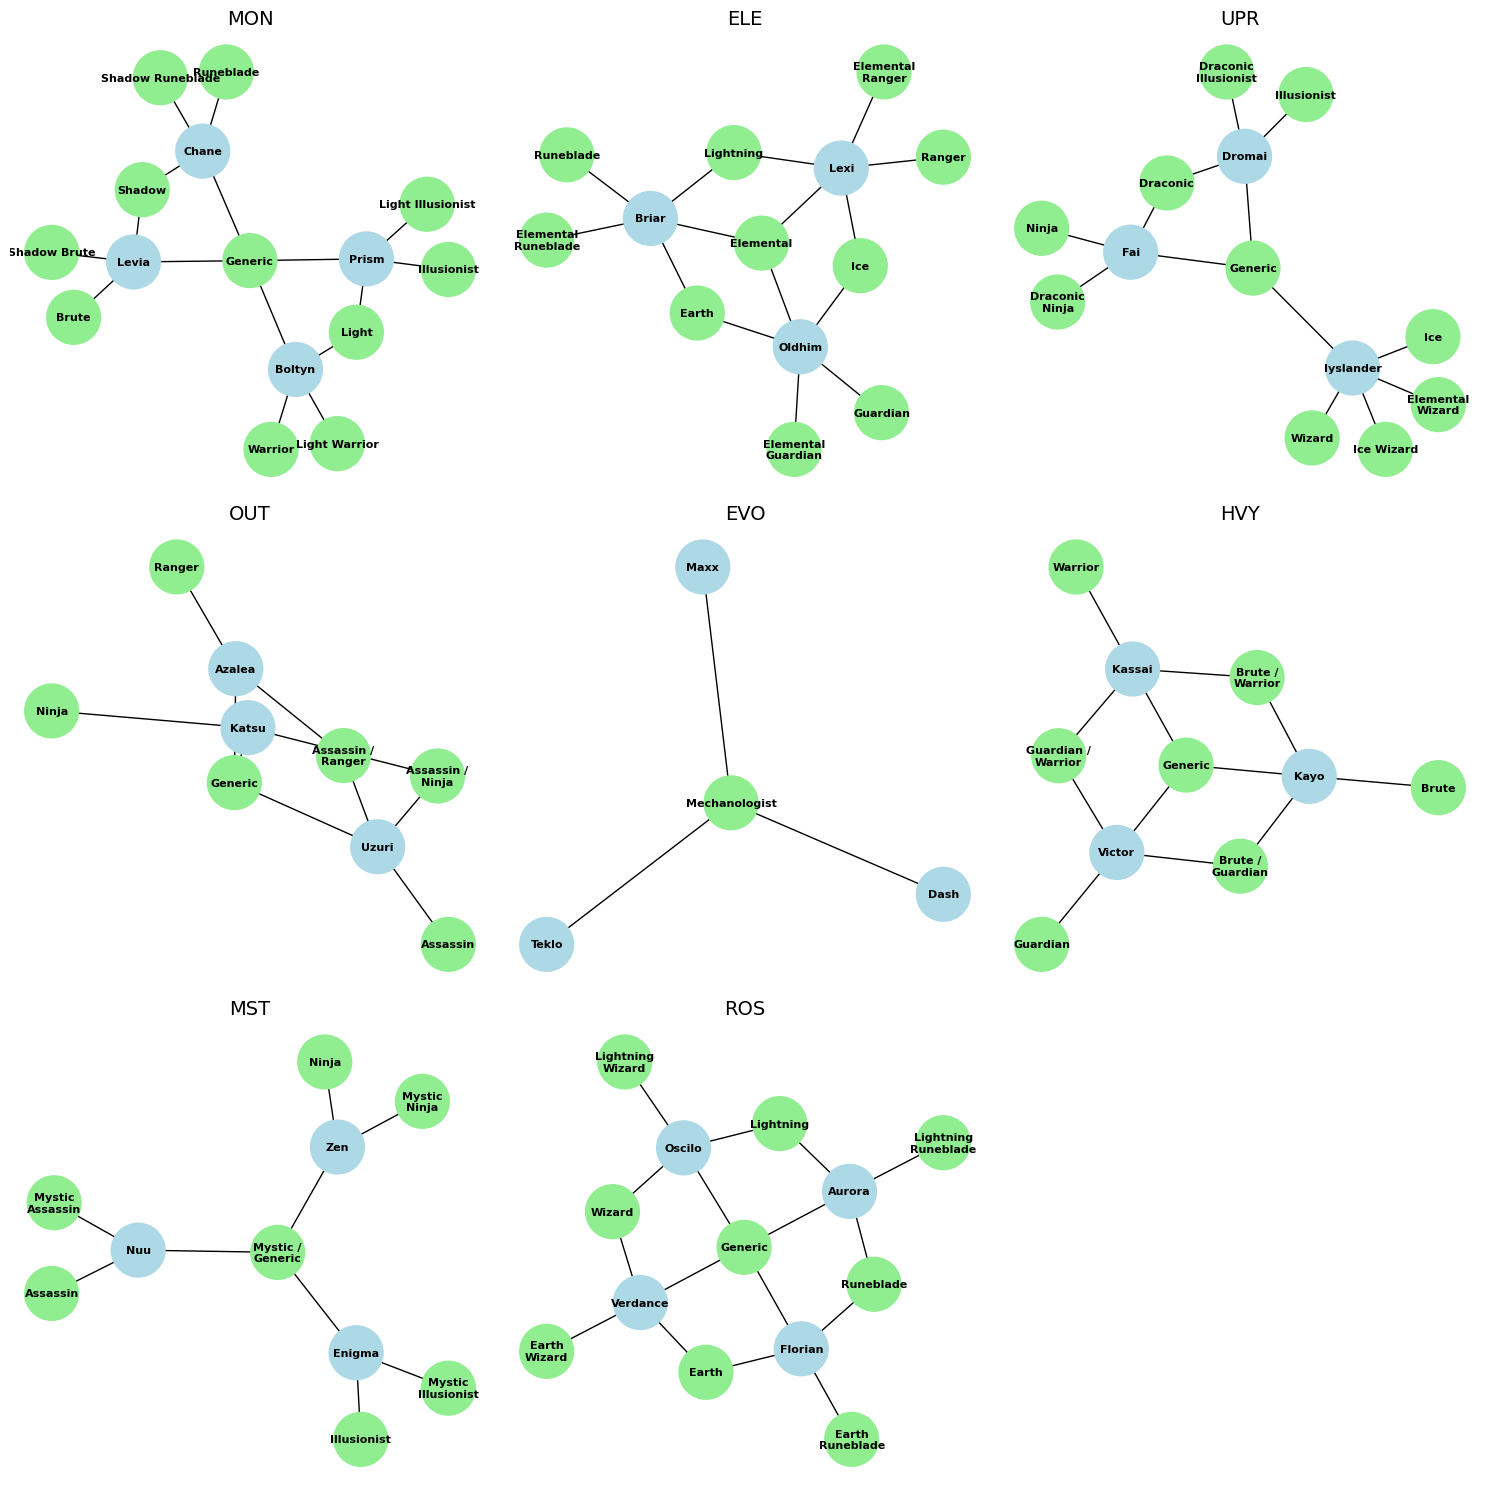

In [126]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Determine the number of columns and rows needed for the subplot grid
ncols = 3
nrows = math.ceil(len(fab_sets) / ncols)

# Define the figure size to accommodate multiple subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each key in fab_sets to create a subplot for each graph
for idx, (graph_set_key, graph_set) in enumerate(fab_sets.items()):
    # Create the original graph
    original_graph = nx.Graph()

    # Add edges between heroes and their card pools
    for hero, pools in graph_set.items():
        for pool in pools:
            original_graph.add_edge(hero, pool)

    # Define node colors: light blue for heroes, light green for card pools
    node_colors = []
    for node in original_graph.nodes():
        if node in graph_set:
            node_colors.append('lightblue')  # Hero
        else:
            node_colors.append('lightgreen')  # Card pool

    # Use a fixed layout for consistency
    pos = nx.spring_layout(original_graph)  # Fixed seed for reproducibility

    # Draw the graph in the corresponding subplot with smaller node and font sizes
    ax = axes[idx]
    nx.draw(original_graph, 
            pos=pos, 
            with_labels=True, 
            node_color=node_colors, 
            font_weight='bold', 
            node_size=1500,  # Smaller node size
            font_size=8,  # Smaller font size
            ax=ax)
    ax.set_title(f'{graph_set_key}', fontsize=14)

# Remove any unused subplots if the number of keys is not a multiple of ncols
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


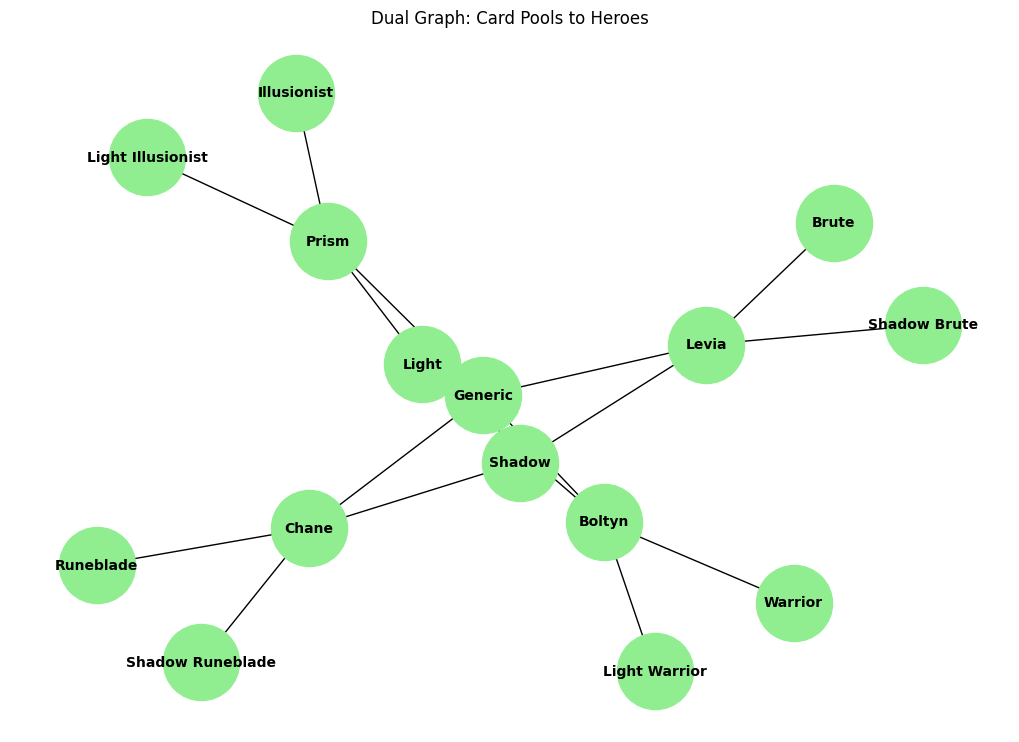

In [120]:
# Create the dual graph
dual_graph = nx.Graph()

# Add edges between card pools and their heroes
for pool, heroes in fab_dual_sets['MON'].items():
    for hero in heroes:
        dual_graph.add_edge(pool, hero)

# Draw the dual graph
plt.figure(figsize=(10, 7))
nx.draw(dual_graph, with_labels=True, node_color='lightgreen', font_weight='bold', node_size=3000, font_size=10)
plt.title('Dual Graph: Card Pools to Heroes')
plt.show()


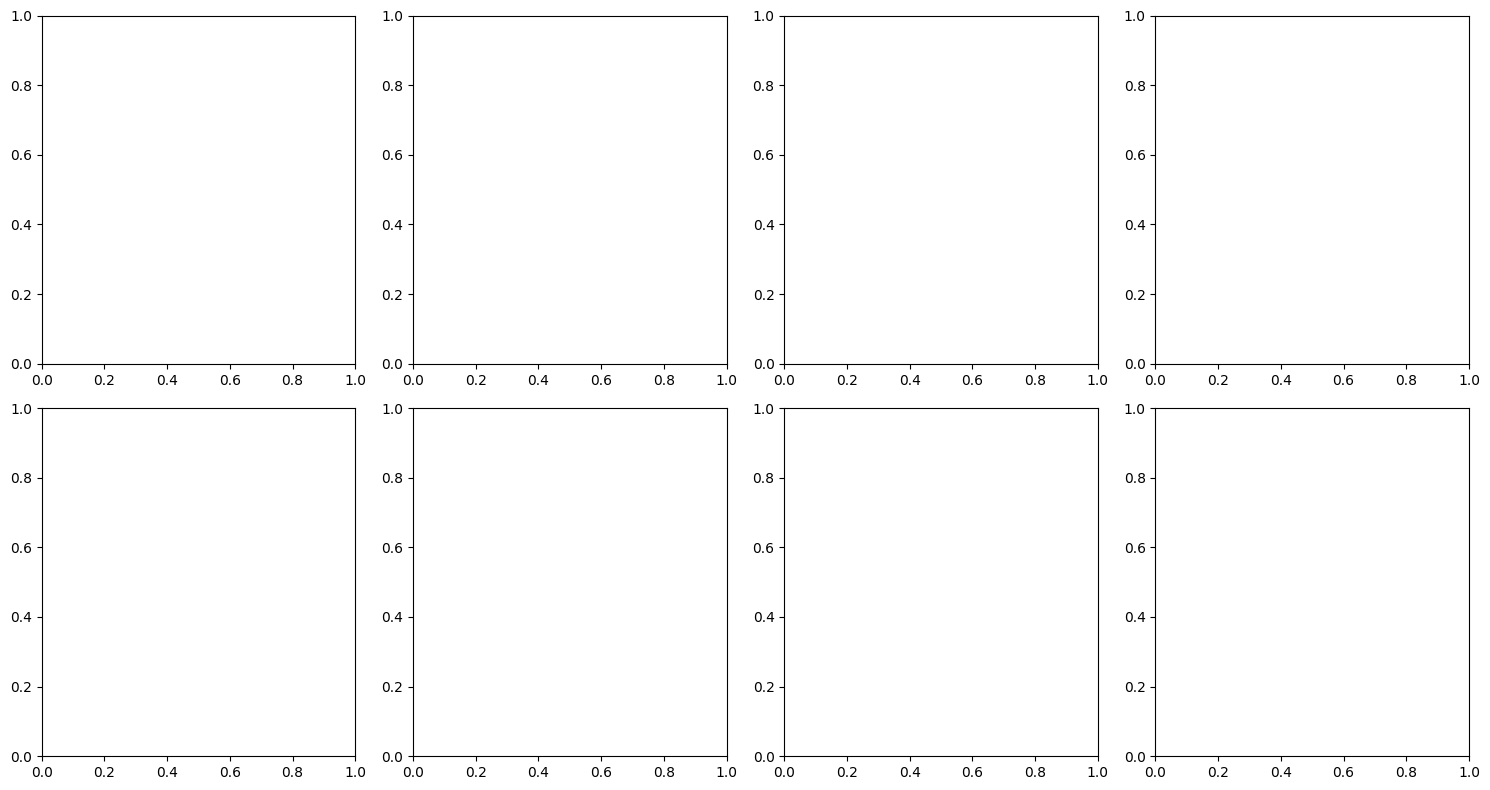

In [121]:

# Create a 2x4 subplot to display all graphs
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Loop through the graphs and plot each one in a subplot
for ax, (name, graph) in zip(axes.flatten(), graphs.items()):
    pos = nx.spring_layout(graph)  # Position nodes using a spring layout
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold', font_size=14)
    
    # Get edge labels and positions
    edge_labels = nx.get_edge_attributes(graph, 'label')
    
    # Adjust the position for self-loops
    adjusted_edge_labels = {}
    for (n1, n2), label in edge_labels.items():
        if n1 == n2:  # This is a self-loop
            adjusted_edge_labels[(n1, n2)] = (pos[n1][0] + 0.05, pos[n1][1] + 0.05)  # Slightly offset the label
        else:
            adjusted_edge_labels[(n1, n2)] = label
            
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red', font_size=12, ax=ax)
    ax.set_title(name)


plt.tight_layout()
plt.show()
